<a href="https://colab.research.google.com/github/Shivani-Nautiyal/student_performance-model/blob/main/student_placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!/bin/bash
!curl -L -o /college-placement-data-set.zip\
  https://www.kaggle.com/api/v1/datasets/download/durgeshrao9993/college-placement-data-set

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4021  100  4021    0     0   6818      0 --:--:-- --:--:-- --:--:-- 46218


In [ ]:
!unzip /college-placement-data-set.zip

Archive:  /college-placement-data-set.zip
  inflating: Placement_Data_Full_Class.csv  


# Step 1: Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# Handling Missing Values
from sklearn.impute import SimpleImputer

# Feature Scaling
from sklearn.preprocessing import StandardScaler # StandardScaler ek class hai jo feature scaling ke liye use hoti hai.
scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()  # MinMaxScaler data ko 0 aur 1 ke beech scale karta hai (normalize karta hai).
from sklearn.preprocessing import RobustScaler
R_scaler = RobustScaler()

# Encoding Categorical Data
from sklearn.preprocessing import OrdinalEncoder # with order ke liye...
encoder = OrdinalEncoder()
from sklearn.preprocessing import OneHotEncoder # w/o order ke liye...
from sklearn.preprocessing import LabelEncoder

# Data Splitting
from sklearn.model_selection import train_test_split

# Preprocessing and Modeling Tools
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline  # Pipeline = ek sequence of steps (like encoding, scaling, modeling)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Load the Dataset

In [ ]:
data = pd.read_csv('/content/Placement_Data_Full_Class.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sno             215 non-null    int64  
 1   Gender          215 non-null    object 
 2   10th %          215 non-null    float64
 3   SSC Board       215 non-null    object 
 4   12th %          215 non-null    float64
 5   HSC Board       215 non-null    object 
 6   12th Stream     215 non-null    object 
 7   Degree %        215 non-null    float64
 8   Degree stream   215 non-null    object 
 9   Work exp        215 non-null    object 
 10  specialisation  215 non-null    object 
 11  Mba %           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


The dataset contains 215 entries with 14 columns, covering both academic and personal details of students along with placement outcomes.

Features are a mix of numerical and categorical variables. Categorical variables will be encoded appropriately for model building.

In [ ]:
data.head()

,Sno,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Work exp,specialisation,Mba %,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,Mkt&Fin,55.50,Placed,425000.0


# Step 3: Exploratory Data Analysis (EDA)

<Axes: xlabel='count', ylabel='status'>

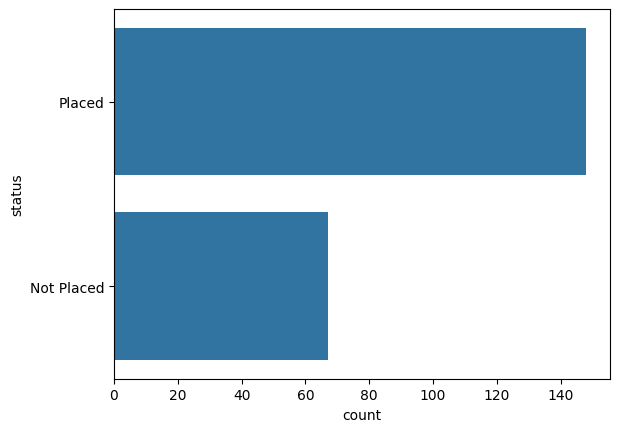

In [ ]:
sns.countplot(data['status'])

The horizontal bar chart clearly indicates that the majority of students were successfully placed.

The number of placed students significantly outweighs the number of non-placed students, demonstrating the overall effectiveness of the placement efforts.

array([[<Axes: title={'center': '10th %'}>,
        <Axes: title={'center': '12th %'}>],
       [<Axes: title={'center': 'Mba %'}>,
        <Axes: title={'center': 'salary'}>]], dtype=object)

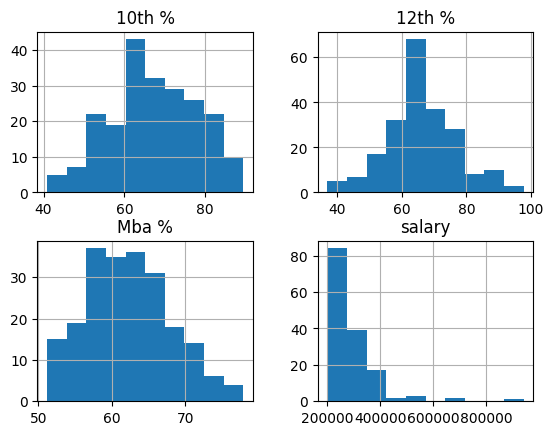

In [ ]:
data[['10th %', '12th %', 'Mba %', 'salary']].hist()

The histograms of academic scores and salary reveal key insights into student performance and placement outcomes.

Most students scored between 60% and 80% in both 10th and 12th grades, with 12th-grade marks showing a near-normal distribution.

MBA percentages also followed a centered distribution, indicating overall balanced academic achievement.

The salary histogram, however, showed a heavy right skew, suggesting that while most students received average salary offers, a small number of high earners created a long tail, indicating the presence of salary outliers.



<Axes: ylabel='salary'>

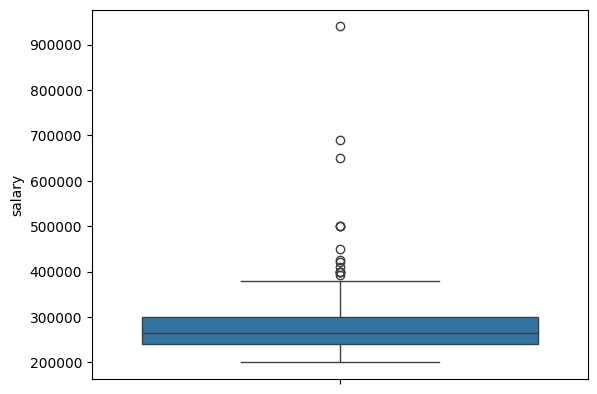

In [ ]:
sns.boxplot(data['salary'])

The box plot of salary clearly reveals a median value around ₹280,000, indicating the central tendency of salary offers.

Most salaries lie between ₹240,000 and ₹380,000, showing a relatively tight distribution.

However, the plot also highlights several outliers — students who received significantly higher salaries, with some exceeding ₹900,000. These high outliers may represent top performers or offers from premium recruiters.

In [ ]:
pd.crosstab(data['Work exp'], data['status'], normalize='index')

status,Not Placed,Placed
Work exp,,
No,0.404255,0.595745
Yes,0.135135,0.864865


Among students without work experience, about 59.6% got placed and 40.4% did not.

Among students with work experience, a much higher 86.5% got placed, and only 13.5% did not.

# Step 4: Data Preprocessing

In [ ]:
# Check for missing values
print(data.isnull().sum())

Sno                0
Gender             0
10th %             0
SSC Board          0
12th %             0
HSC Board          0
12th Stream        0
Degree %           0
Degree stream      0
Work exp           0
specialisation     0
Mba %              0
status             0
salary            67
dtype: int64


On inspecting missing values, we found that the salary column contains 67 null entries, accounting for approximately 31% of the dataset.

This is expected, as students who were not placed do not have a salary value.

In [ ]:
imp = SimpleImputer(strategy='median')

Missing values in numerical columns were handled using median imputation, which replaces each missing entry with the column’s median value.

This approach was chosen over mean imputation to reduce the influence of outliers and better maintain the central tendency of skewed variables like salary.

In [ ]:
# (NaN) ko -1 (const) se replace krenge
imputer = SimpleImputer(strategy='constant',fill_value=-1)

For some categorical or encoded variables, missing values were filled using a constant value of -1.

This approach helps preserve the information that the data was missing, allowing tree-based models to use it as a separate category.



In [ ]:
# fit_transform -> method missing values ko detect karta hai aur unhe -1 se replace karta hai
imputed_salary = imputer.fit_transform(data[['salary']])
data['salary']=imputed_salary

The fit_transform() method identified all NaN values and replaced them with -1, effectively marking cases where salary was not applicable (typically for unplaced students).



In [ ]:
scaled_salary = scaler.fit_transform(data[['salary']])

Since StandardScaler() expects a 2D input, we passed data[['salary']] instead of a 1D series.

The fit_transform() method then calculated the mean and standard deviation of the salary column and applied standardization, converting the values to a scale with mean 0 and standard deviation 1.

This ensures the salary feature is normalized for better model performance.

<Axes: >

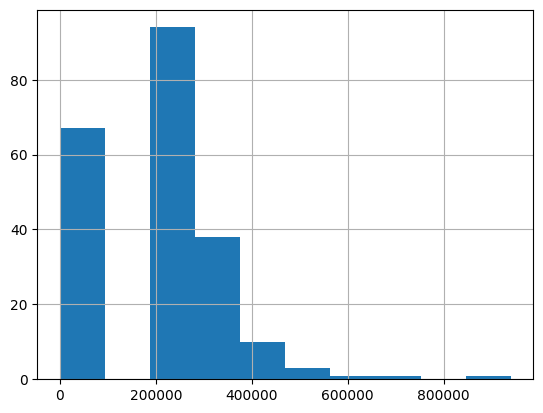

In [ ]:
data['salary'].hist()

The salary distribution is heavily right-skewed, with most placed students earning between ₹200,000 and ₹300,000.

A noticeable spike around 0 represents unplaced students whose missing salary values were replaced with a placeholder value (-1).

A few high salary entries act as outliers and may influence model performance if not handled properly. This insight helps us decide on normalization techniques and whether to apply outlier treatment before modeling.

In [ ]:
salary_min_Sacle = scaler2.fit_transform(data[['salary']])

Min-Max Scaling was applied to the salary column using MinMaxScaler, which transformed all values into the range [0, 1].

This ensures that salary values are normalized and treated equally by machine learning models that are sensitive to feature scale.

In [ ]:
salary_r_scale = R_scaler.fit_transform(data[['salary']])

RobustScaler was applied to the salary column to scale the values while minimizing the influence of outliers.

Unlike other scalers that rely on the mean and standard deviation, RobustScaler uses the median and interquartile range (IQR).

This makes it ideal for handling right-skewed salary distributions with extreme high values, ensuring a more stable and reliable input for model training.







<Axes: ylabel='Count'>

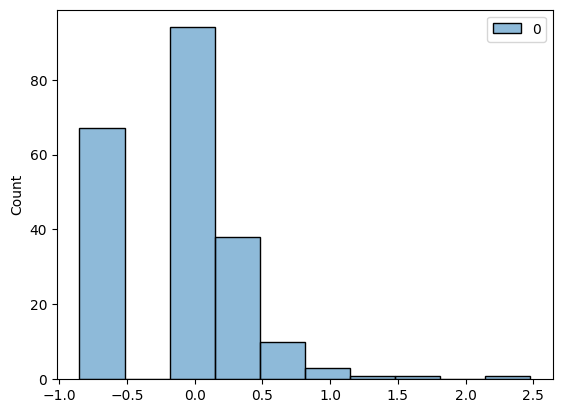

In [ ]:
sns.histplot(salary_r_scale)

After applying RobustScaler to the salary column, the resulting distribution is centered around zero, with a reduced impact of extreme values.

The histogram confirms that most data points are clustered within a small range near the median, while outliers on the higher end are now less exaggerated.

In [ ]:
data.head(1)

,Sno,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Work exp,specialisation,Mba %,status,salary
0,1,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,Mkt&HR,58.8,Placed,270000.0


In [ ]:
encoder = LabelEncoder()
data['Work_encode'] = encoder.fit_transform(data['Work exp'])

The Work exp column was label encoded using LabelEncoder, where 'Yes' was mapped to 1 and 'No' to 0.

This binary conversion makes the feature suitable for machine learning models.

In [ ]:
OHE = OneHotEncoder(drop='first', sparse_output=False)
categorical_cols = ['Gender', 'SSC Board', 'HSC Board', '12th Stream',
                    'Degree stream', 'Work exp', 'specialisation']
OHE_EN = OHE.fit_transform(data[categorical_cols])

In [ ]:
OHE_EN

array([[1., 1., 1., ..., 1., 0., 1.],
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.]])

OneHotEncoder was applied to all categorical columns, converting each unique category into binary features.

To avoid multicollinearity, the first category from each feature was dropped.

This transformation enables the model to interpret categorical data numerically without implying any order.

In [ ]:
x = data.drop(columns=['Sno', 'status', 'salary'])


The features Sno, status, and salary were removed from the dataset.

Sno was dropped as it holds no predictive value, while status (the target) and salary were excluded to prepare the input feature set x for model training.

In [ ]:
y = data['status']
y

,status
0,Placed
1,Placed
2,Placed
3,Not Placed
4,Placed
...,...
210,Placed
211,Placed
212,Placed
213,Placed


The status column was assigned to variable y, which serves as the target label for classification.

This variable represents the placement outcome of each student, categorized as either 'Placed' or 'Not Placed'.

In [ ]:
x.head(1)

,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Work exp,specialisation,Mba %
0,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,Mkt&HR,58.8


In [ ]:
y = LabelEncoder().fit_transform(y)
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

The target variable y was label-encoded to convert categorical labels ('Placed' and 'Not Placed') into numeric form.

This step is necessary for enabling compatibility with machine learning algorithms, which require numerical input for classification tasks.

# Step 5: Model Building and Evaluation

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

The dataset was split into training and testing sets using an 80/20 ratio.

This ensures that the model can be trained on a majority of the data while being evaluated on unseen data for generalization performance.

The random_state was set to 45 to ensure consistent and reproducible results.

In [ ]:
x.iloc[0,8] # Ye index-based selection karta hai (position se). 0,...

'No'

In [ ]:
trf1=ColumnTransformer([
    ('imputer',SimpleImputer(strategy='most_frequent'),slice(-1))
],remainder='passthrough')  # baki columns ko as-it-is rakhna


A ColumnTransformer was used to apply SimpleImputer with the 'most_frequent' strategy to all columns except the last one.

This helps handle missing values by replacing them with the most common entry in each column.
(no need here!)

In [ ]:
trf2=ColumnTransformer([
    ('ORD_encoder',OrdinalEncoder(categories=[['No','Yes']]),[8]),
    ('OHE_encoder',OrdinalEncoder(),[0,2,4,5,7,9])
],remainder='passthrough')

A ColumnTransformer was applied to encode categorical columns.

The 'Work exp' column was ordinally encoded using a custom category order ('No' < 'Yes'), while other categorical columns were encoded using default OrdinalEncoder.

Remaining numeric columns were passed through without modification.

This preprocessing ensures all features are in numeric format, suitable for model training.

In [ ]:
trf3=ColumnTransformer([
    ('scaler',StandardScaler(),slice(0,-1))
],remainder='passthrough')

A ColumnTransformer was used to apply StandardScaler to all features except the last one.

Standardization centers the data around zero and ensures consistent scaling, which improves performance and convergence of distance-based and linear models.

The final column was passed through unchanged to preserve its original form.



In [ ]:
trf41 = LogisticRegression()
trf42 = DecisionTreeClassifier()
trf43 = RandomForestClassifier()
trf44 = SVC()

Four classification algorithms were initialized for model comparison: Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine (SVC).

This variety allows testing both linear and non-linear models to determine which performs best on the placement prediction task.

In [ ]:
model_lg = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf41)
])
model_dt = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf42)
])
model_rf = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf43)
])
model_svc = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf44)
])

Pipelines were created for each model — Logistic Regression, Decision Tree, Random Forest, and SVC.

In [ ]:
models = {
    'Logistic Regression': model_lg,
    'Decision Tree': model_dt,
    'Random Forest': model_rf,
    'SVM': model_svc
}

for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.91      0.91      0.91        32

    accuracy                           0.86        43
   macro avg       0.82      0.82      0.82        43
weighted avg       0.86      0.86      0.86        43


Model: Decision Tree
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.97      0.88      0.92        32

    accuracy                           0.88        43
   macro avg       0.84      0.89      0.86        43
weighted avg       0.90      0.88      0.89        43


Model: Random Forest
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        11
           1       0.88      0.88      0.88        32

    accuracy                           0.81        43
   macro avg       0.76      0.76      0.76        43
we

Random Forest is the best-performing model, offering both accuracy and balanced performance.

SVM is a close second and is useful when model interpretability and generalization are priorities.

Logistic Regression is simple and effective; Decision Tree may slightly overfit on small datasets.

In [ ]:
model_rf.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  slice(None, -1, None))])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ORD_encoder',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes']]),
                                                  [8]),
                                                 ('OHE_encoder',
                                                  OrdinalEncoder(),
                                                  [0, 2, 4, 5, 7, 9])])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, -1, None))])),
                ('trf4', RandomForestClassifier())])

In [ ]:
import joblib
joblib.dump(model_rf,'placement_model.pkl')

['placement_model.pkl']

The trained Random Forest model (model_rf) was saved using joblib.dump() into a file named placement_model.pkl.

This allows the model to be reused later for predictions without retraining, enabling efficient deployment in production or applications.